#BUSINESS OVERVIEW

SyriaTel is a telecommunication company based in Syria. The services of the company include voice and data services. Recently, the company has been concerned about the increased rate of customer churn that is resulting to high loss of revenue. The company is looking to outsource a data scientist to help identify the contributing factors that are leading to customer's opting out on the services.


#PROBLEM STATEMENT

Customer churn rate has a significant impact on any company's bottom line. This is because it causes loss of revenue and market share as there's considerable cost implications in the getting new customers and could affect company's reputation. It is more cost-effective to retain existing customers than using money to get new ones. The effects of customer churn makes has made it necessary for SyrialTel company to identify the factors that contribute to customer churn and take proactive steps to retain its customers. This will be achieved through developing a model that accurately predicts customer churn to allow for it to take preventive measures.

#PROJECT OBJECTIVE

1. Develop a classifier that predicts which customers are likely to churn so that SyriaTel can take appropriate actions and reduce customer attrition.
2.  

DATA 

Summary of Features in the Datset

state: the state the customer lives in
account length: the number of days the customer has had an account
area code: the area code of the customer
phone number: the phone number of the customer
international plan: true if the customer has the international plan, otherwise false
voice mail plan: true if the customer has the voice mail plan, otherwise false
number vmail messages: the number of voicemails the customer has sent
total day minutes: total number of minutes the customer has been in calls during the day
total day calls: total number of calls the user has done during the day
total day charge: total amount of money the customer was charged by the Telecom company for calls during the day
total eve minutes: total number of minutes the customer has been in calls during the evening
total eve calls: total number of calls the customer has done during the evening
total eve charge: total amount of money the customer was charged by the Telecom company for calls during the evening
total night minutes: total number of minutes the customer has been in calls during the night
total night calls: total number of calls the customer has done during the night
total night charge: total amount of money the customer was charged by the Telecom company for calls during the night
total intl minutes: total number of minutes the user has been in international calls
total intl calls: total number of international calls the customer has done
total intl charge: total amount of money the customer was charged by the Telecom company for international calls
customer service calls: number of calls the customer has made to customer service
churn: true if the customer terminated their contract, otherwise false

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

1. DATA UNDERSTANDING
Data Source - Kaggle
The data describes and highlights each su

In [2]:
df = pd.read_csv("churn_telcom.csv")
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

We have no missing values
Data has both continuous and categorical features comprising of the following data types; objects, integers, float and booleans

In [4]:
#check statistics of each Column
pd.set_option("precision", 2)
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
account length,3333.0,101.06,39.82,1.00,74.00,101.00,127.00,243.00
area code,3333.0,437.18,42.37,408.00,408.00,415.00,510.00,510.00
number vmail messages,3333.0,8.10,13.69,0.00,0.00,0.00,20.00,51.00
total day minutes,3333.0,179.78,54.47,0.00,143.70,179.40,216.40,350.80
total day calls,3333.0,100.44,20.07,0.00,87.00,101.00,114.00,165.00
total day charge,3333.0,30.56,9.26,0.00,24.43,30.50,36.79,59.64
total eve minutes,3333.0,200.98,50.71,0.00,166.60,201.40,235.30,363.70
total eve calls,3333.0,100.11,19.92,0.00,87.00,100.00,114.00,170.00
total eve charge,3333.0,17.08,4.31,0.00,14.16,17.12,20.00,30.91
total night minutes,3333.0,200.87,50.57,23.20,167.00,201.20,235.30,395.00


In [5]:
#check number of rows and columns
df.shape

(3333, 21)

In [6]:
#Check for Unique Values
for dataset in df:
    print("For {},{} unique values present".format(dataset,df[dataset].nunique()))

For state,51 unique values present
For account length,212 unique values present
For area code,3 unique values present
For phone number,3333 unique values present
For international plan,2 unique values present
For voice mail plan,2 unique values present
For number vmail messages,46 unique values present
For total day minutes,1667 unique values present
For total day calls,119 unique values present
For total day charge,1667 unique values present
For total eve minutes,1611 unique values present
For total eve calls,123 unique values present
For total eve charge,1440 unique values present
For total night minutes,1591 unique values present
For total night calls,120 unique values present
For total night charge,933 unique values present
For total intl minutes,162 unique values present
For total intl calls,21 unique values present
For total intl charge,162 unique values present
For customer service calls,10 unique values present
For churn,2 unique values present


In [7]:
df.nunique()

state                       51
account length             212
area code                    3
phone number              3333
international plan           2
voice mail plan              2
number vmail messages       46
total day minutes         1667
total day calls            119
total day charge          1667
total eve minutes         1611
total eve calls            123
total eve charge          1440
total night minutes       1591
total night calls          120
total night charge         933
total intl minutes         162
total intl calls            21
total intl charge          162
customer service calls      10
churn                        2
dtype: int64

In [8]:
df.duplicated().sum()

0

False    2850
True      483
Name: churn, dtype: int64


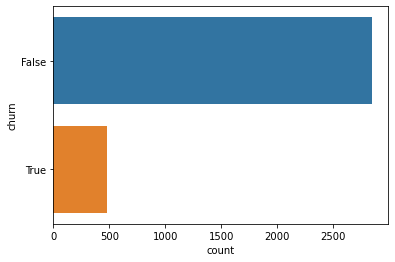

In [9]:
# Countplot of churn feature
print(df.churn.value_counts())
sns.countplot(data=df, y='churn');

In [10]:
#Drop phone number and area code for following reasons add no value and data privacy 
df.drop(["phone number", "area code"],axis=1, inplace=True)
df.head()

,state,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [11]:
categorical_cols = []
for col in df.columns:
    if df[col].dtype == 'object' or df[col].dtype.name == 'category' or df[col].dtype == 'bool':
        categorical_cols.append(col)
categorical_cols

['state', 'international plan', 'voice mail plan', 'churn']

In [12]:
num_cols = df.select_dtypes(include=['number']).columns.tolist()
num_cols

['account length',
 'number vmail messages',
 'total day minutes',
 'total day calls',
 'total day charge',
 'total eve minutes',
 'total eve calls',
 'total eve charge',
 'total night minutes',
 'total night calls',
 'total night charge',
 'total intl minutes',
 'total intl calls',
 'total intl charge',
 'customer service calls']

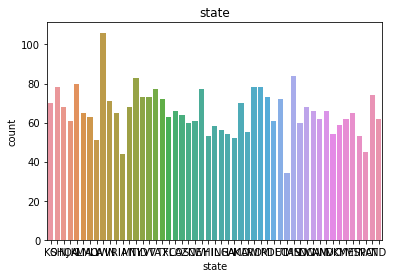

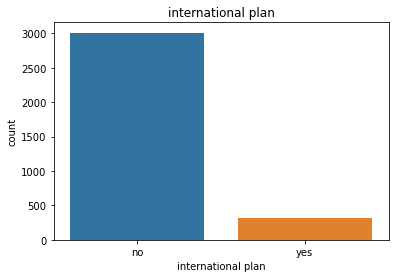

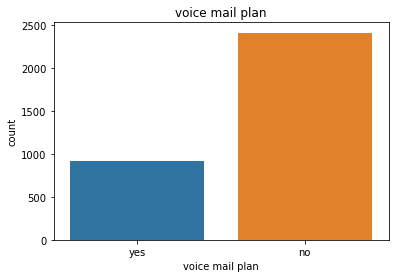

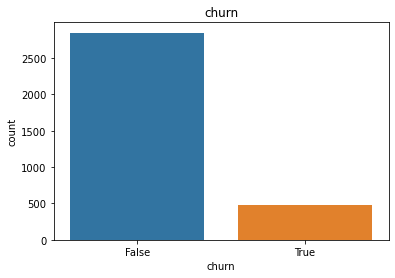

In [13]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning) # setting ignore as a parameter and further adding category

#plot bar plot for each categorical column
for col in categorical_cols:
    sns.countplot(df[col])
    plt.title(col)
    plt.show()

<AxesSubplot:>

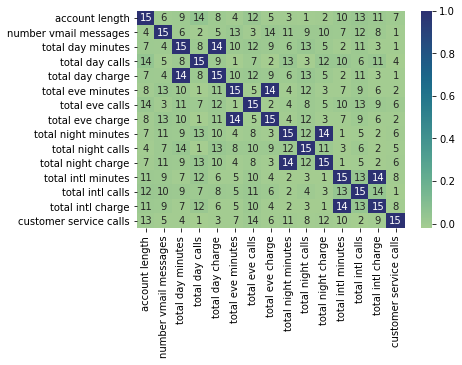

In [14]:
# Create a correlation matrix of the numerical columns
corr_matrix = df[num_cols].corr()

# Plot a heatmap of the correlation matrix
sns.heatmap(corr_matrix, annot=corr_matrix.rank(axis="columns"), cmap="crest")

In [15]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['churn'] = label_encoder.fit_transform(df['churn'])
df.head()

,state,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [16]:
y = df["churn"]
X = df.drop(columns=["churn"], axis=1)

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

#Preprocessing

Dealing with Categorical Data

In [18]:
X_train_categorical = X_train.select_dtypes(exclude=["int64", "float64"]).copy()
X_train_categorical

,state,international plan,voice mail plan
427,NH,no,yes
1656,ND,no,yes
1042,FL,yes,yes
1867,NH,yes,yes
346,WI,no,yes
...,...,...,...
835,GA,no,no
3264,RI,no,yes
1653,MD,yes,no
2607,IL,no,no


In [19]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
X_train_categorical['international plan'] = label_encoder.fit_transform(X_train_categorical['international plan'])
X_train_categorical['voice mail plan'] = label_encoder.fit_transform(X_train_categorical['voice mail plan'])
X_train_categorical['state'] = label_encoder.fit_transform(X_train_categorical['state'])
X_train_categorical.head()

,state,international plan,voice mail plan
427,30,0,1
1656,28,0,1
1042,9,1,1
1867,30,1,1
346,48,0,1


In [21]:
X_train_numeric = X_train.select_dtypes(include=["int64", "float64"]).copy()
X_train_numeric

,account length,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
427,67,40,104.9,65,17.83,216.3,93,18.39,217.4,128,9.78,9.6,9,2.59,1
1656,101,28,105.9,132,18.00,231.7,107,19.69,281.3,120,12.66,10.7,5,2.89,1
1042,91,24,93.5,112,15.90,183.4,128,15.59,240.7,133,10.83,9.9,3,2.67,0
1867,142,25,191.1,109,32.49,149.6,120,12.72,227.8,60,10.25,9.8,3,2.65,0
346,81,33,161.6,117,27.47,123.0,90,10.46,261.3,101,11.76,12.2,5,3.29,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
835,27,0,72.7,75,12.36,208.6,117,17.73,65.8,71,2.96,9.9,3,2.67,1
3264,89,24,97.8,98,16.63,207.2,67,17.61,214.5,126,9.65,5.9,2,1.59,0
1653,93,0,131.4,78,22.34,219.7,106,18.67,155.7,103,7.01,11.1,2,3.00,1
2607,91,0,189.3,100,32.18,239.3,107,20.34,89.7,89,4.04,9.9,3,2.67,3


In [22]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(X_train_numeric)
X_train_scaled = pd.DataFrame(
    scaler.transform(X_train_numeric),
    # index is important to ensure we can concatenate with other columns
    index=X_train_numeric.index,
    columns=X_train_numeric.columns
)
X_train_scaled

,account length,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
427,0.29,0.78,0.30,0.39,0.30,0.59,0.55,0.59,0.52,0.73,0.52,0.48,0.45,0.48,0.11
1656,0.43,0.55,0.30,0.80,0.30,0.64,0.63,0.64,0.69,0.66,0.69,0.54,0.25,0.54,0.11
1042,0.39,0.47,0.27,0.68,0.27,0.50,0.75,0.50,0.58,0.76,0.59,0.50,0.15,0.49,0.00
1867,0.61,0.49,0.54,0.66,0.54,0.41,0.71,0.41,0.55,0.21,0.55,0.49,0.15,0.49,0.00
346,0.35,0.65,0.46,0.71,0.46,0.34,0.53,0.34,0.64,0.52,0.64,0.61,0.25,0.61,0.11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
835,0.11,0.00,0.21,0.45,0.21,0.57,0.69,0.57,0.11,0.29,0.11,0.50,0.15,0.49,0.11
3264,0.38,0.47,0.28,0.59,0.28,0.57,0.39,0.57,0.51,0.71,0.51,0.30,0.10,0.29,0.00
1653,0.40,0.00,0.37,0.47,0.37,0.60,0.62,0.60,0.36,0.53,0.36,0.56,0.10,0.56,0.11
2607,0.39,0.00,0.54,0.61,0.54,0.66,0.63,0.66,0.18,0.43,0.18,0.50,0.15,0.49,0.33


In [23]:
X_train_full = pd.concat([X_train_scaled, X_train_categorical], axis=1)
X_train_full

,account length,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,state,international plan,voice mail plan
427,0.29,0.78,0.30,0.39,0.30,0.59,0.55,0.59,0.52,0.73,0.52,0.48,0.45,0.48,0.11,30,0,1
1656,0.43,0.55,0.30,0.80,0.30,0.64,0.63,0.64,0.69,0.66,0.69,0.54,0.25,0.54,0.11,28,0,1
1042,0.39,0.47,0.27,0.68,0.27,0.50,0.75,0.50,0.58,0.76,0.59,0.50,0.15,0.49,0.00,9,1,1
1867,0.61,0.49,0.54,0.66,0.54,0.41,0.71,0.41,0.55,0.21,0.55,0.49,0.15,0.49,0.00,30,1,1
346,0.35,0.65,0.46,0.71,0.46,0.34,0.53,0.34,0.64,0.52,0.64,0.61,0.25,0.61,0.11,48,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
835,0.11,0.00,0.21,0.45,0.21,0.57,0.69,0.57,0.11,0.29,0.11,0.50,0.15,0.49,0.11,10,0,0
3264,0.38,0.47,0.28,0.59,0.28,0.57,0.39,0.57,0.51,0.71,0.51,0.30,0.10,0.29,0.00,39,0,1
1653,0.40,0.00,0.37,0.47,0.37,0.60,0.62,0.60,0.36,0.53,0.36,0.56,0.10,0.56,0.11,20,1,0
2607,0.39,0.00,0.54,0.61,0.54,0.66,0.63,0.66,0.18,0.43,0.18,0.50,0.15,0.49,0.33,14,0,0


2. DATA PREPARATION

2.1 Data Cleaning

In [ ]:
#Drop phone number and area code for following reasons add no value and data privacy 
df.drop(["phone number", "area code"],axis=1, inplace=True)
df.head()

In [ ]:
df.churn = df.churn.astype(int)

In [ ]:
df.hist(figsize=(18,15), bins="auto");

In [ ]:
# Create numeric & categorical lists
numeric_cols = ['account length','number vmail messages','total day minutes','total day calls','total day charge',
                'total eve minutes','total eve calls','total eve charge','total night minutes','total night calls',
                'total night charge','total intl minutes','total intl calls','total intl charge','customer service calls']
categoric_cols = ['state','international plan','voice mail plan']